# Import libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import seaborn as sns
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

# Load data

In [91]:
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [93]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [94]:
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)


In [95]:
# 62 null values where present in oldpeak and it is inpute by median

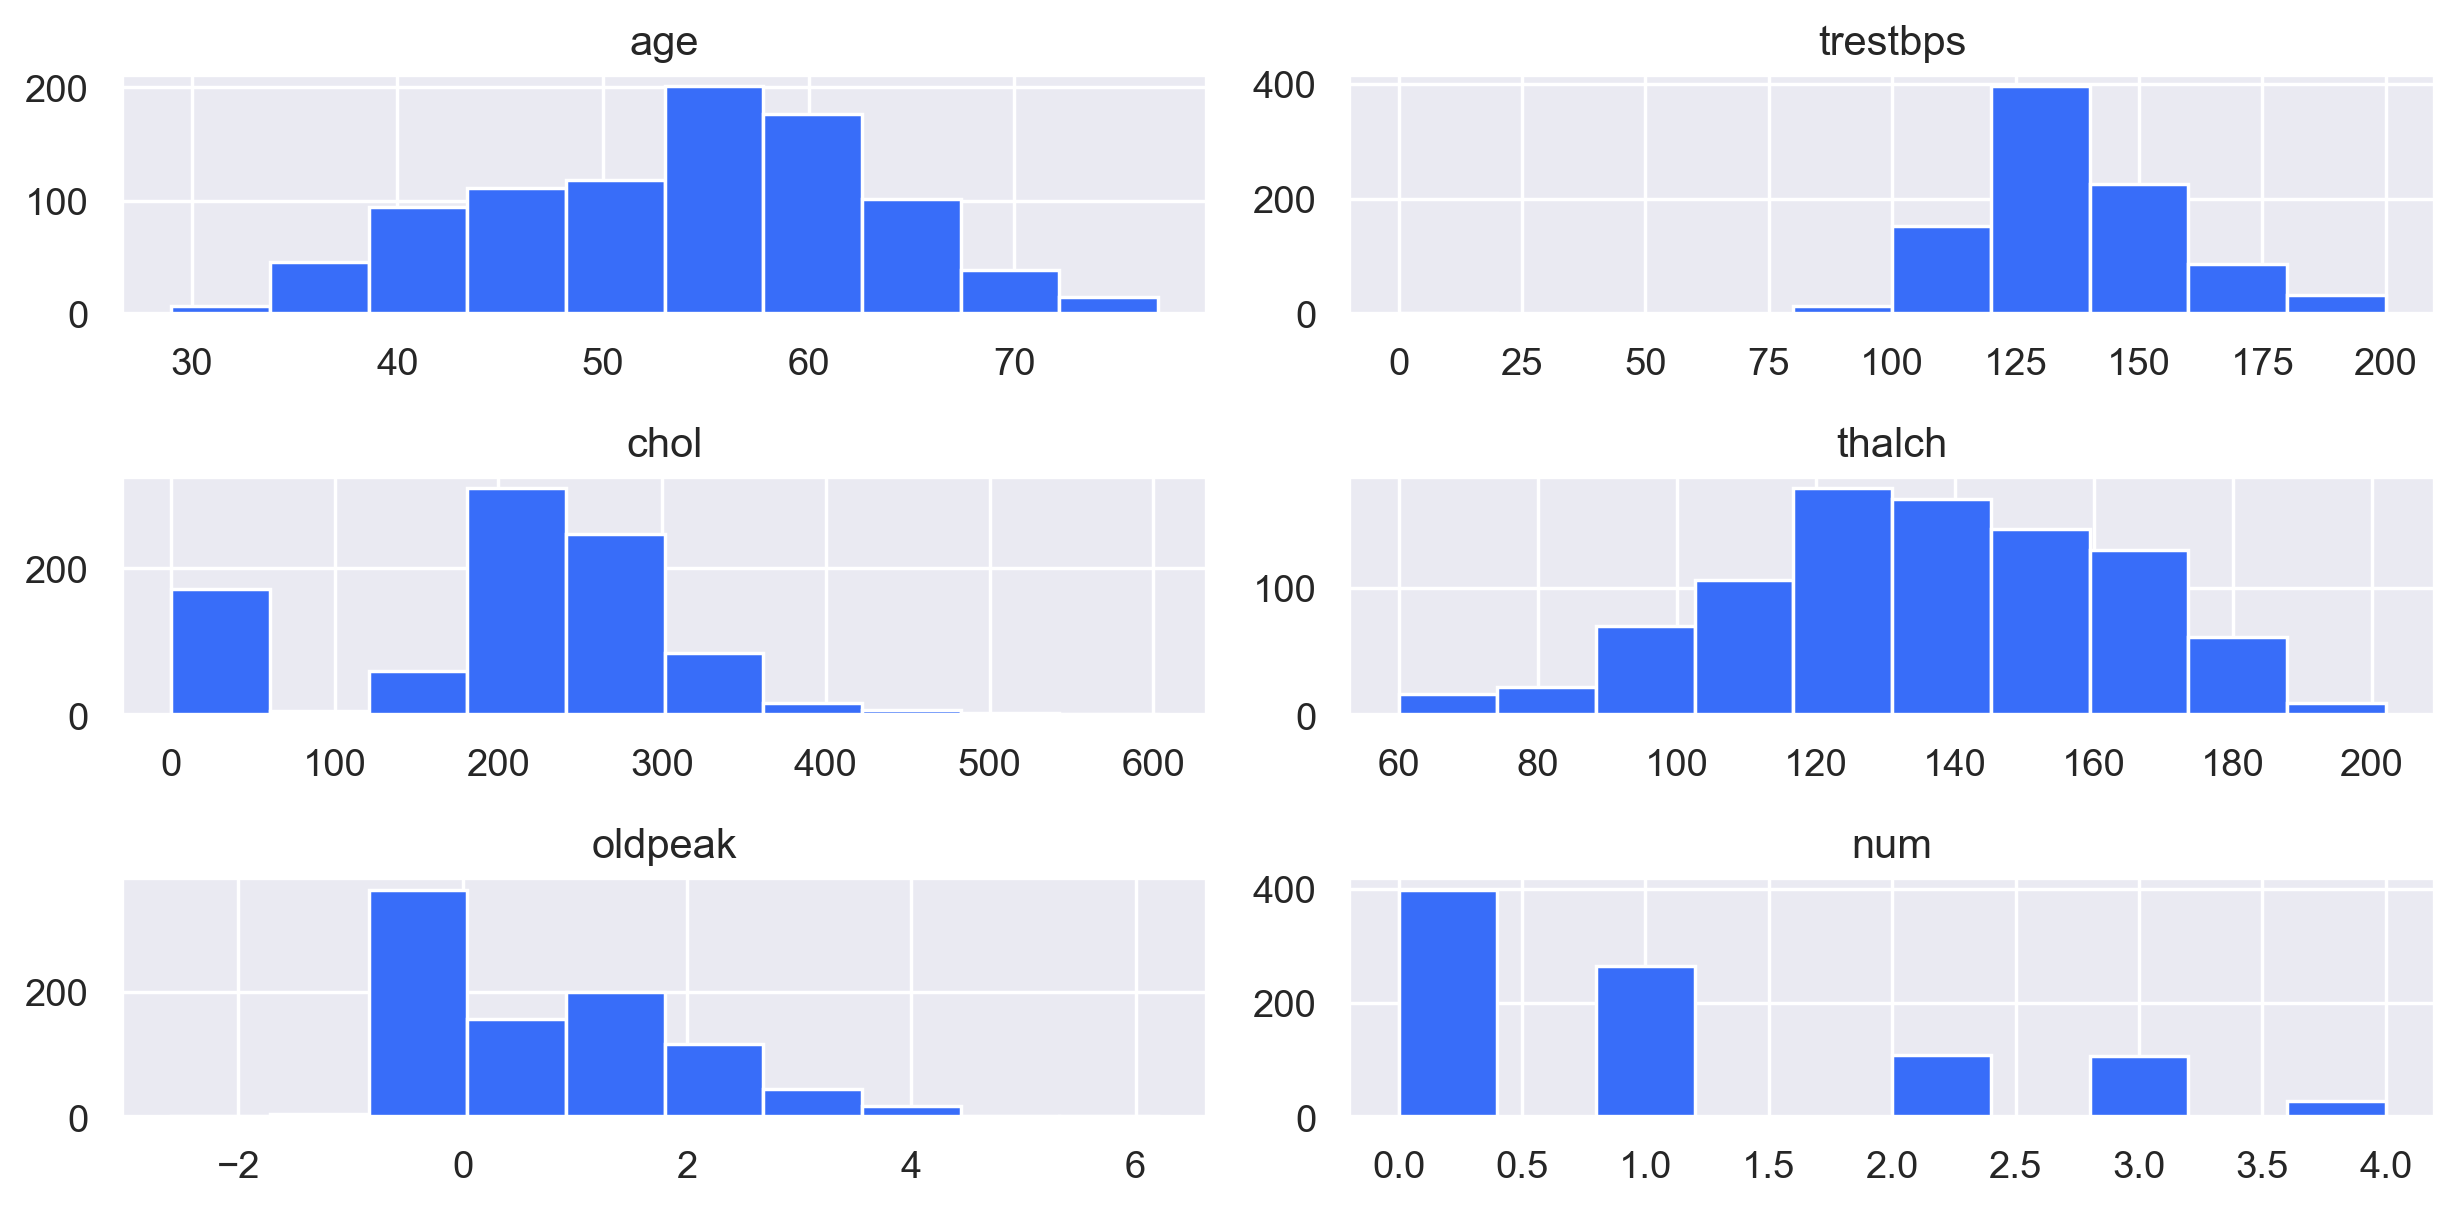

In [96]:
df.hist()
plt.tight_layout()
plt.show()

In [97]:
# age, thalch, and oldpeak had normal distributions.

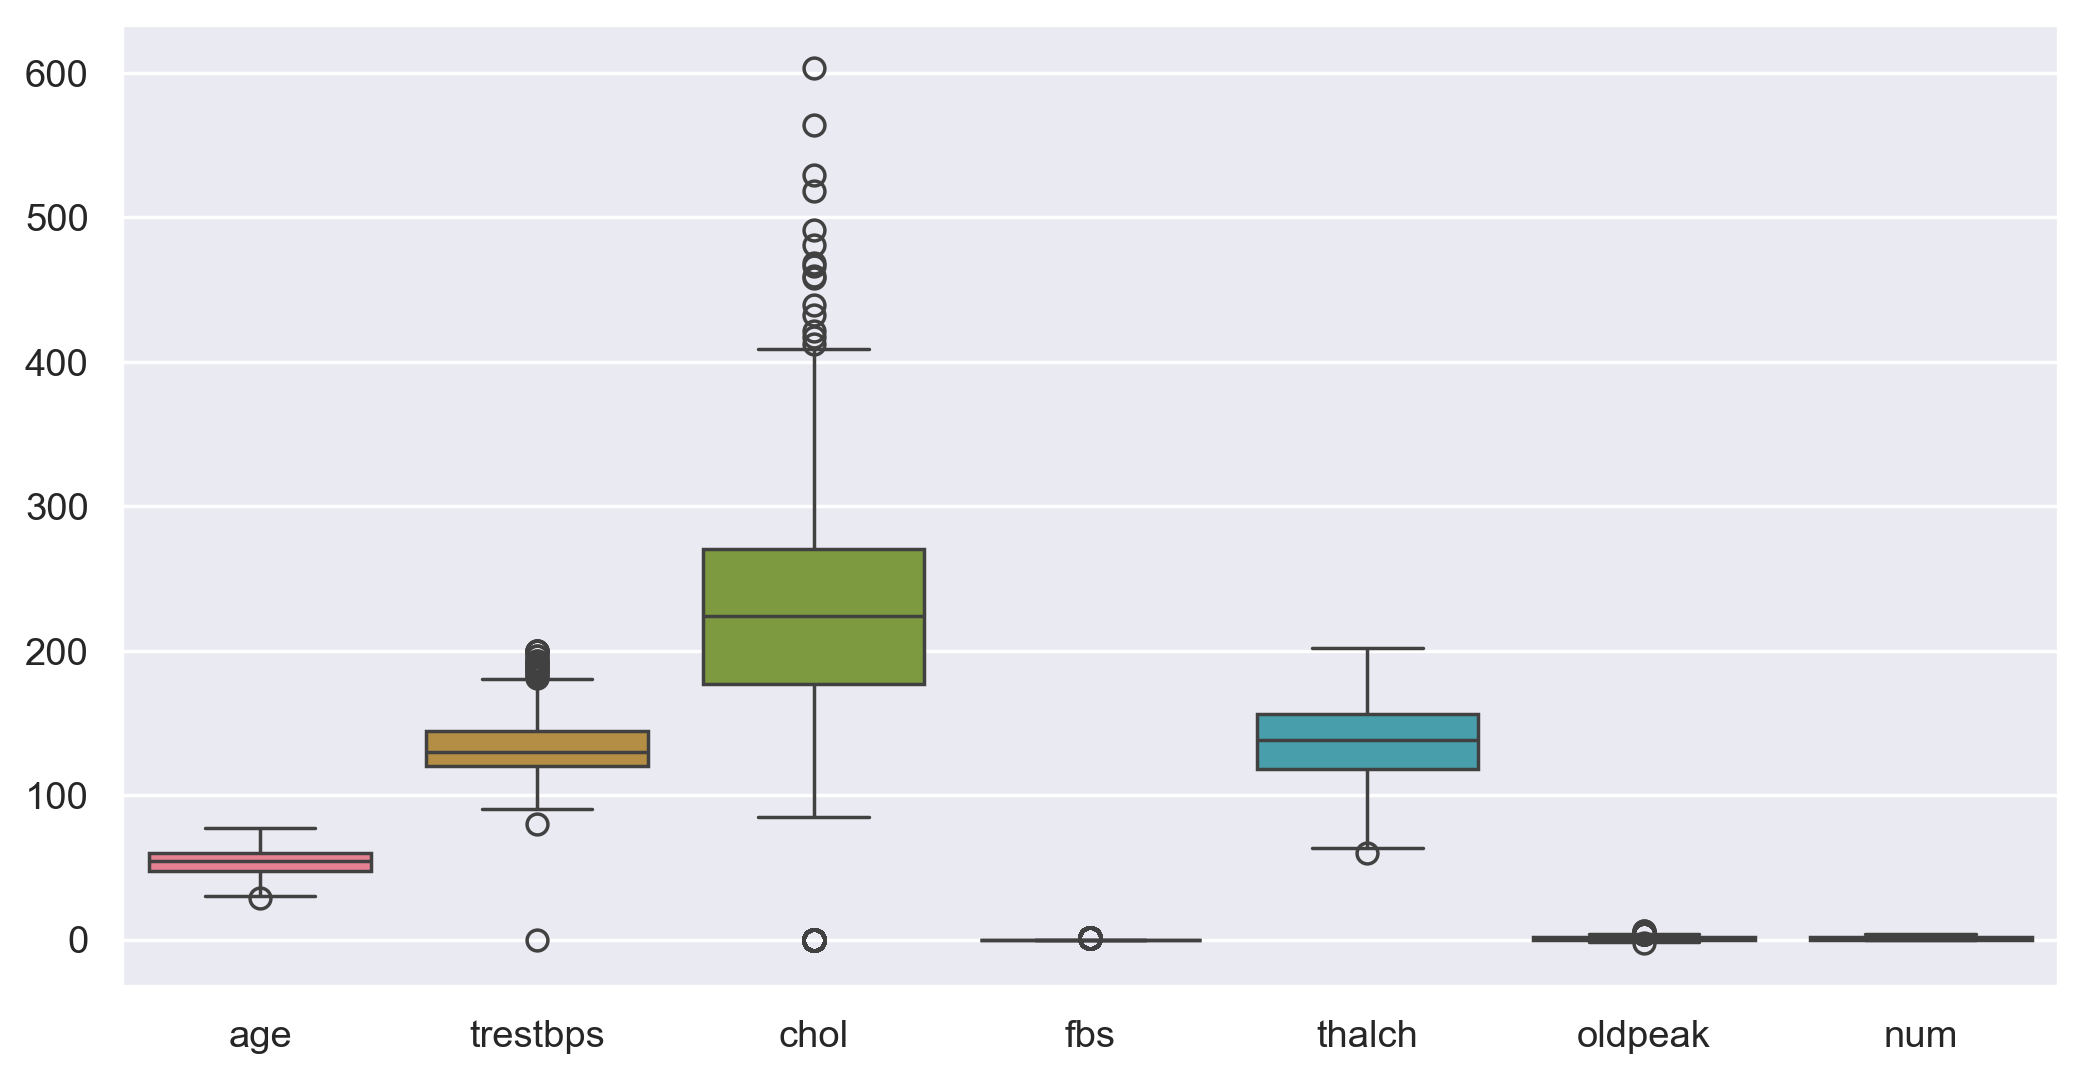

In [98]:
sns.boxplot(df)
plt.show() 

In [99]:
# trestbps and chol contained outliers and zero entries.

In [100]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

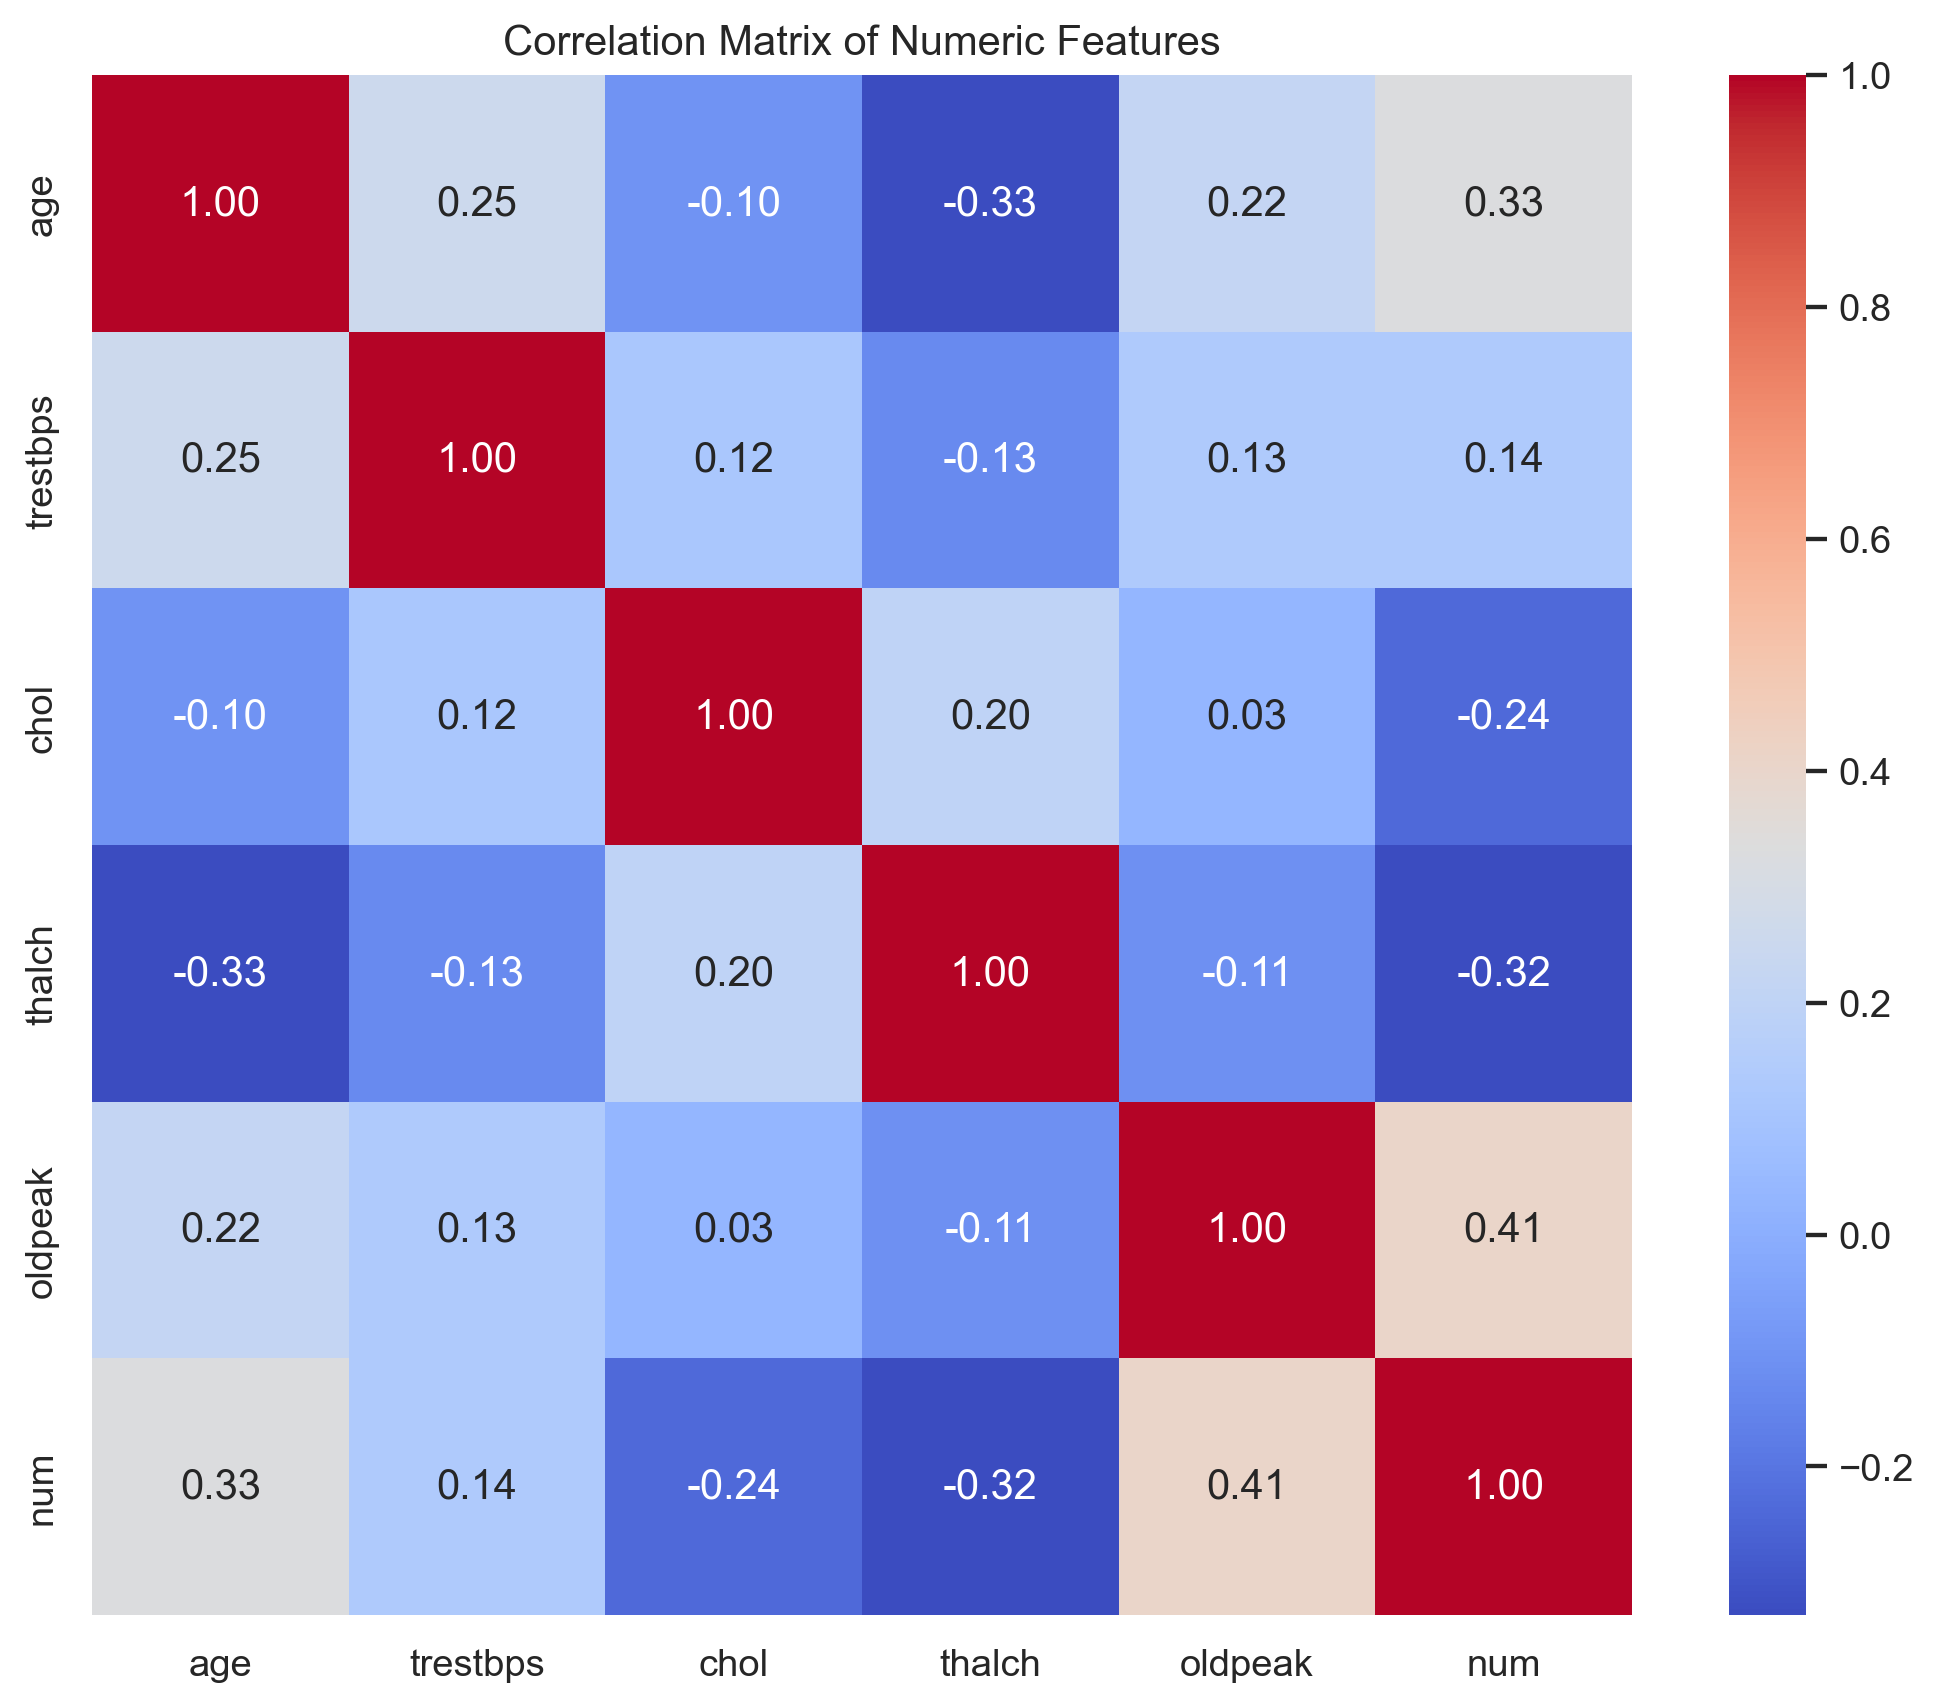

In [101]:
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [56]:
# Correlation Matrix revealed moderate relationships between features like oldpeak, thalch, and the target variable.

In [102]:
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].map({'TRUE': 1, 'FALSE': 0})

In [103]:
# Converted fbs and exang to numeric form.

In [104]:
categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,1,150,0.0,2.3,0,True,False,False,True,False,False,False,False,False,False
1,41,135,203,0,132,0.0,0.0,0,True,True,False,False,True,False,True,False,False,False
2,57,140,192,0,148,0.0,0.4,0,True,False,False,False,True,False,True,False,False,False
3,52,118,186,0,190,0.0,0.0,0,True,False,False,True,False,False,True,False,False,False
4,57,110,201,0,126,1.0,1.5,0,True,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,0,120,0.0,1.5,4,True,False,False,False,True,False,False,True,False,True
904,62,166,170,0,120,1.0,3.0,4,True,False,False,False,False,True,True,False,False,False
905,56,170,0,0,123,1.0,2.5,4,True,False,True,False,False,False,False,False,False,True
906,56,144,208,1,105,NaN,0.5,4,True,False,True,False,False,True,False,False,False,False


In [105]:
#One-hot encoding applied to features like sex, cp, restecg, slope, and thal.

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
df_encoded['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [108]:
# binary classification for target variable 0 = no disease and >0 = disease

In [109]:
X = df_encoded.drop(['num', 'target'], axis=1)
y = df_encoded['target']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [111]:
# train-test split

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [115]:
# Decision tree 

In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [117]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1] 

In [72]:
# Evaluation metrics

In [118]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.7087912087912088
Precision: 0.7378640776699029
Recall: 0.7450980392156863
F1-score: 0.7414634146341463
ROC-AUC: 0.7037990196078431


In [119]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.67        80
           1       0.74      0.75      0.74       102

    accuracy                           0.71       182
   macro avg       0.70      0.70      0.70       182
weighted avg       0.71      0.71      0.71       182



In [ ]:
'''
# Accuracy 0.73 , 73% of predictions were correct

# class 0 (No Disease)
  # Recall 0.65, Only 65% of actual no-disease cases are correctly identified.

# class 1 (Heart Disease)
  # Recall 0.78 , Model detects 78% of actual disease cases
  # Precision 0.73 , When it predicts 'disease' it's right 74% of the time
  # F1-score 0.76 , Balanced strength in both precision & recall
'''

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']  
}

In [122]:
dt = DecisionTreeClassifier(random_state=42)

In [123]:
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,  
    scoring='f1',  
    n_jobs=-1,     
    verbose=1
)

In [124]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

In [125]:
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Best F1 Score: 0.7830929462694168


In [126]:
best_model = grid_search.best_estimator_

In [127]:
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

In [128]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [129]:
print("Tuned Model Evaluation:")
print(classification_report(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_best))

Tuned Model Evaluation:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        80
           1       0.78      0.79      0.79       102

    accuracy                           0.76       182
   macro avg       0.75      0.75      0.75       182
weighted avg       0.76      0.76      0.76       182

ROC-AUC: 0.8064338235294117


In [ ]:
'''
Class 0 (No Disease)
Precision and recall are balanced 0.71 – 0.73.


Class 1 (Has Disease)
Recall 0.79, model is catching 79% of actual disease cases, which is critical in healthcare.

Precision 0.78, its also accurate when it predicts disease.

ROC-AUC = 0.81
This shows model can distinguish between classes 81% of the time, which is a strong result.
'''

In [130]:
from sklearn.tree import plot_tree

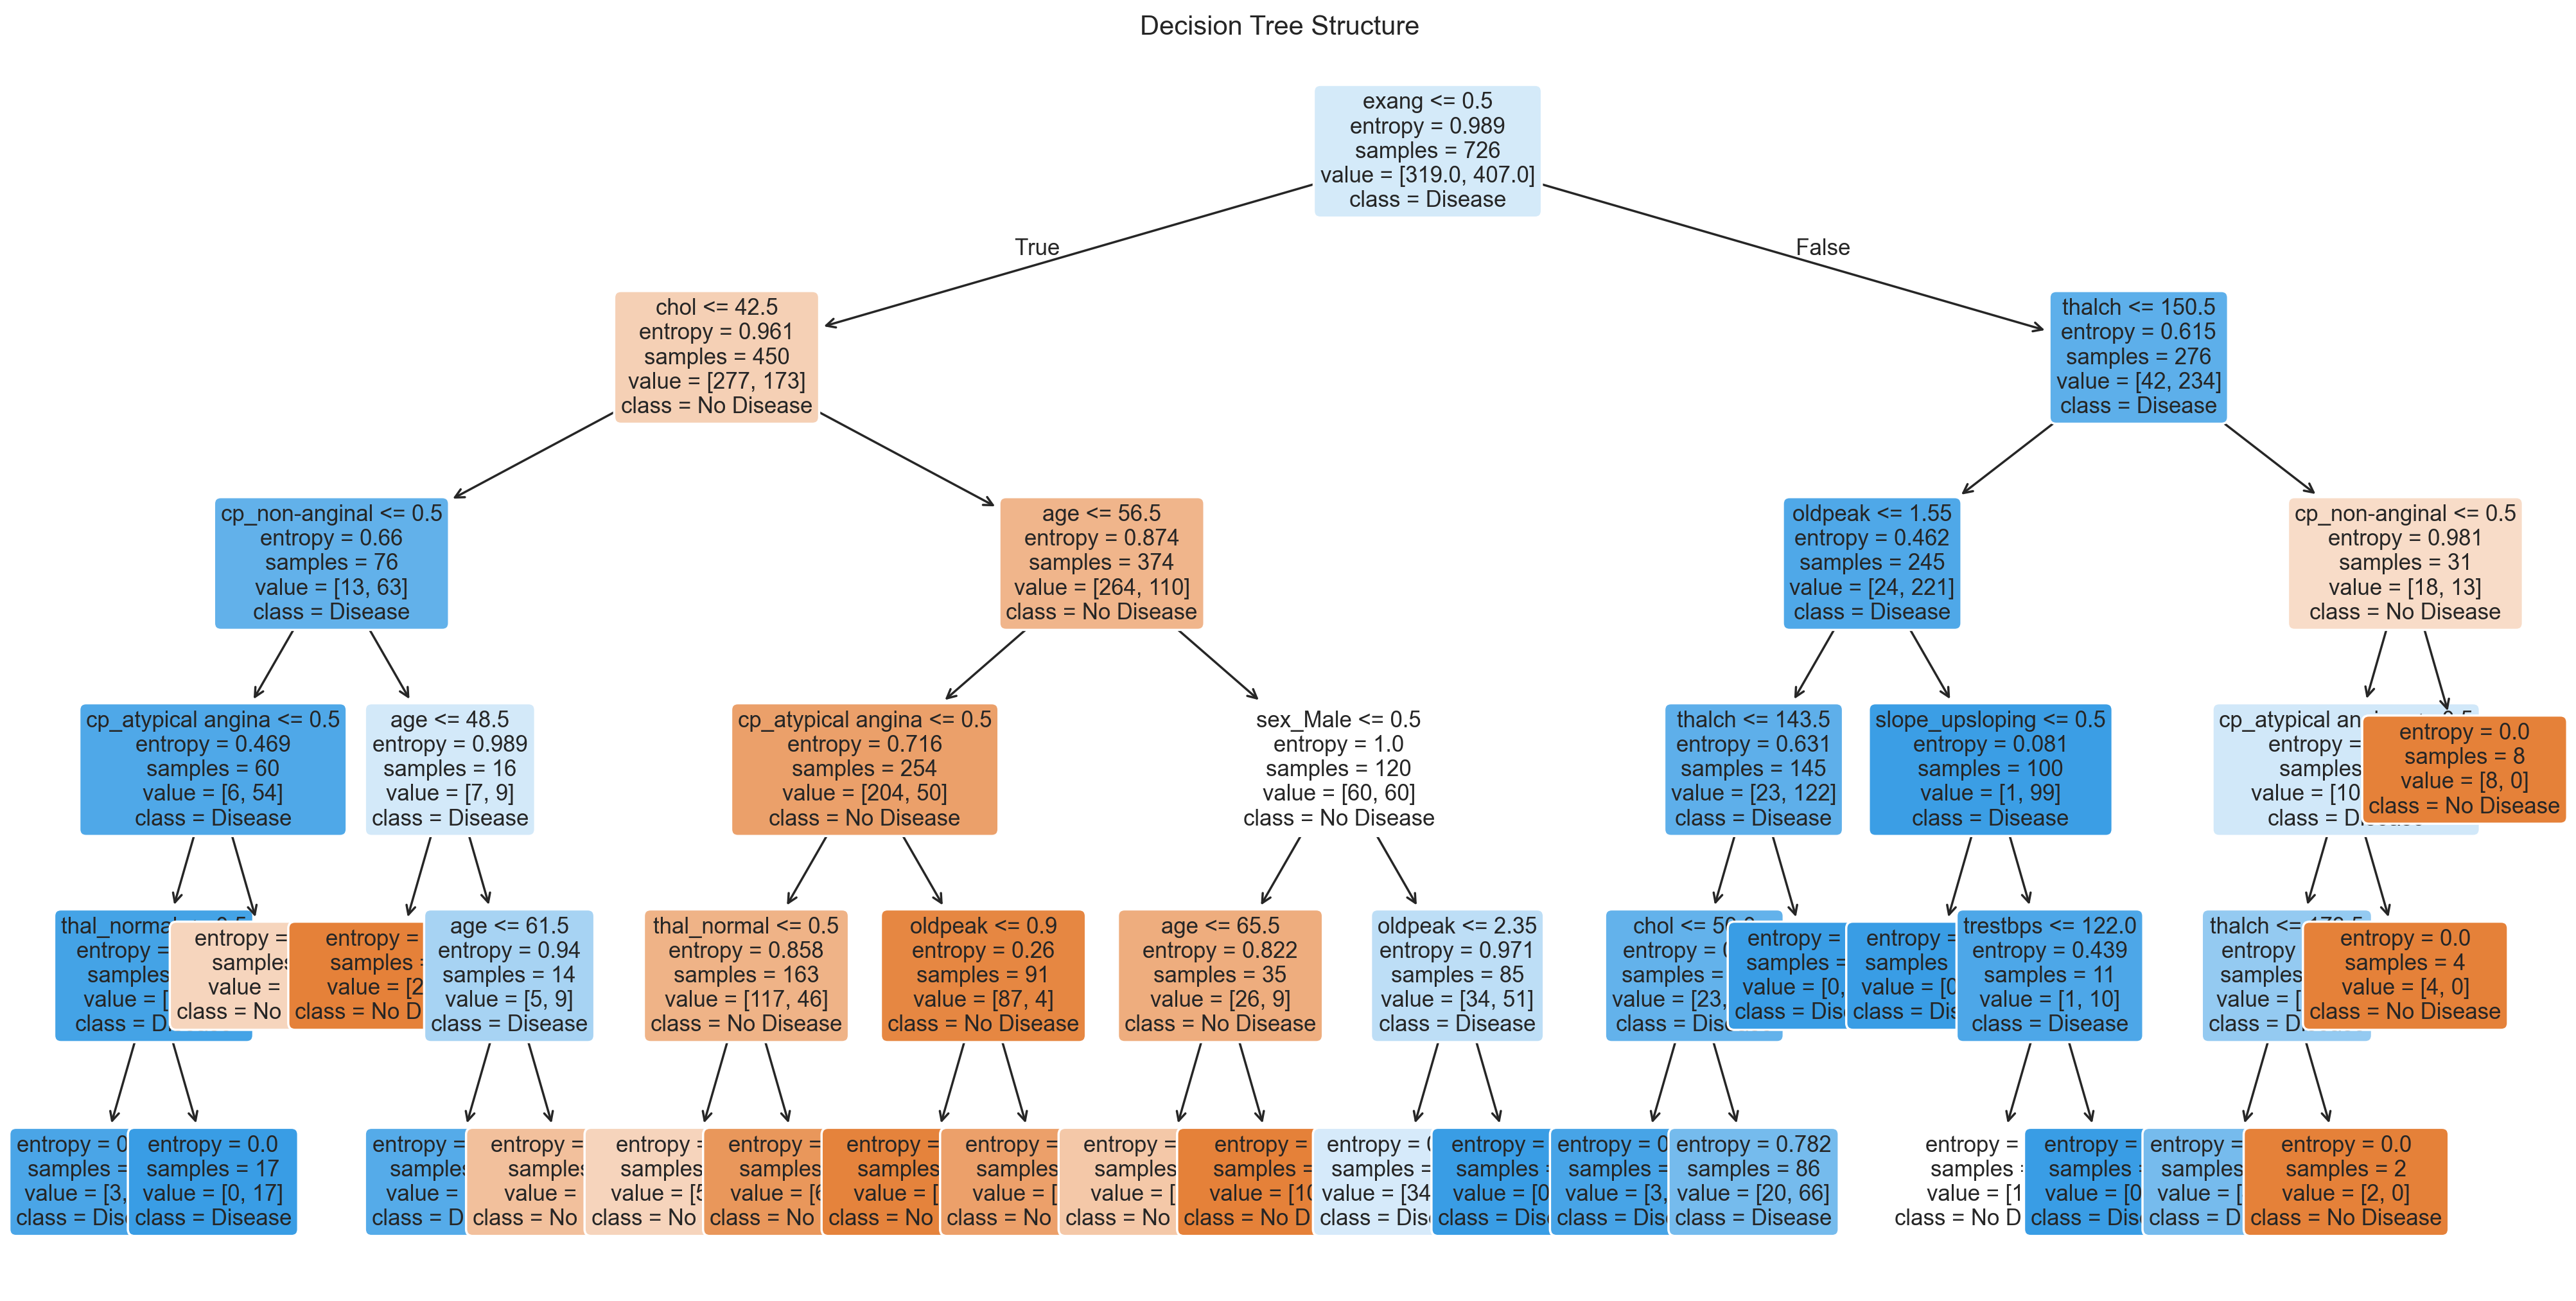

In [131]:
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()

In [88]:
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

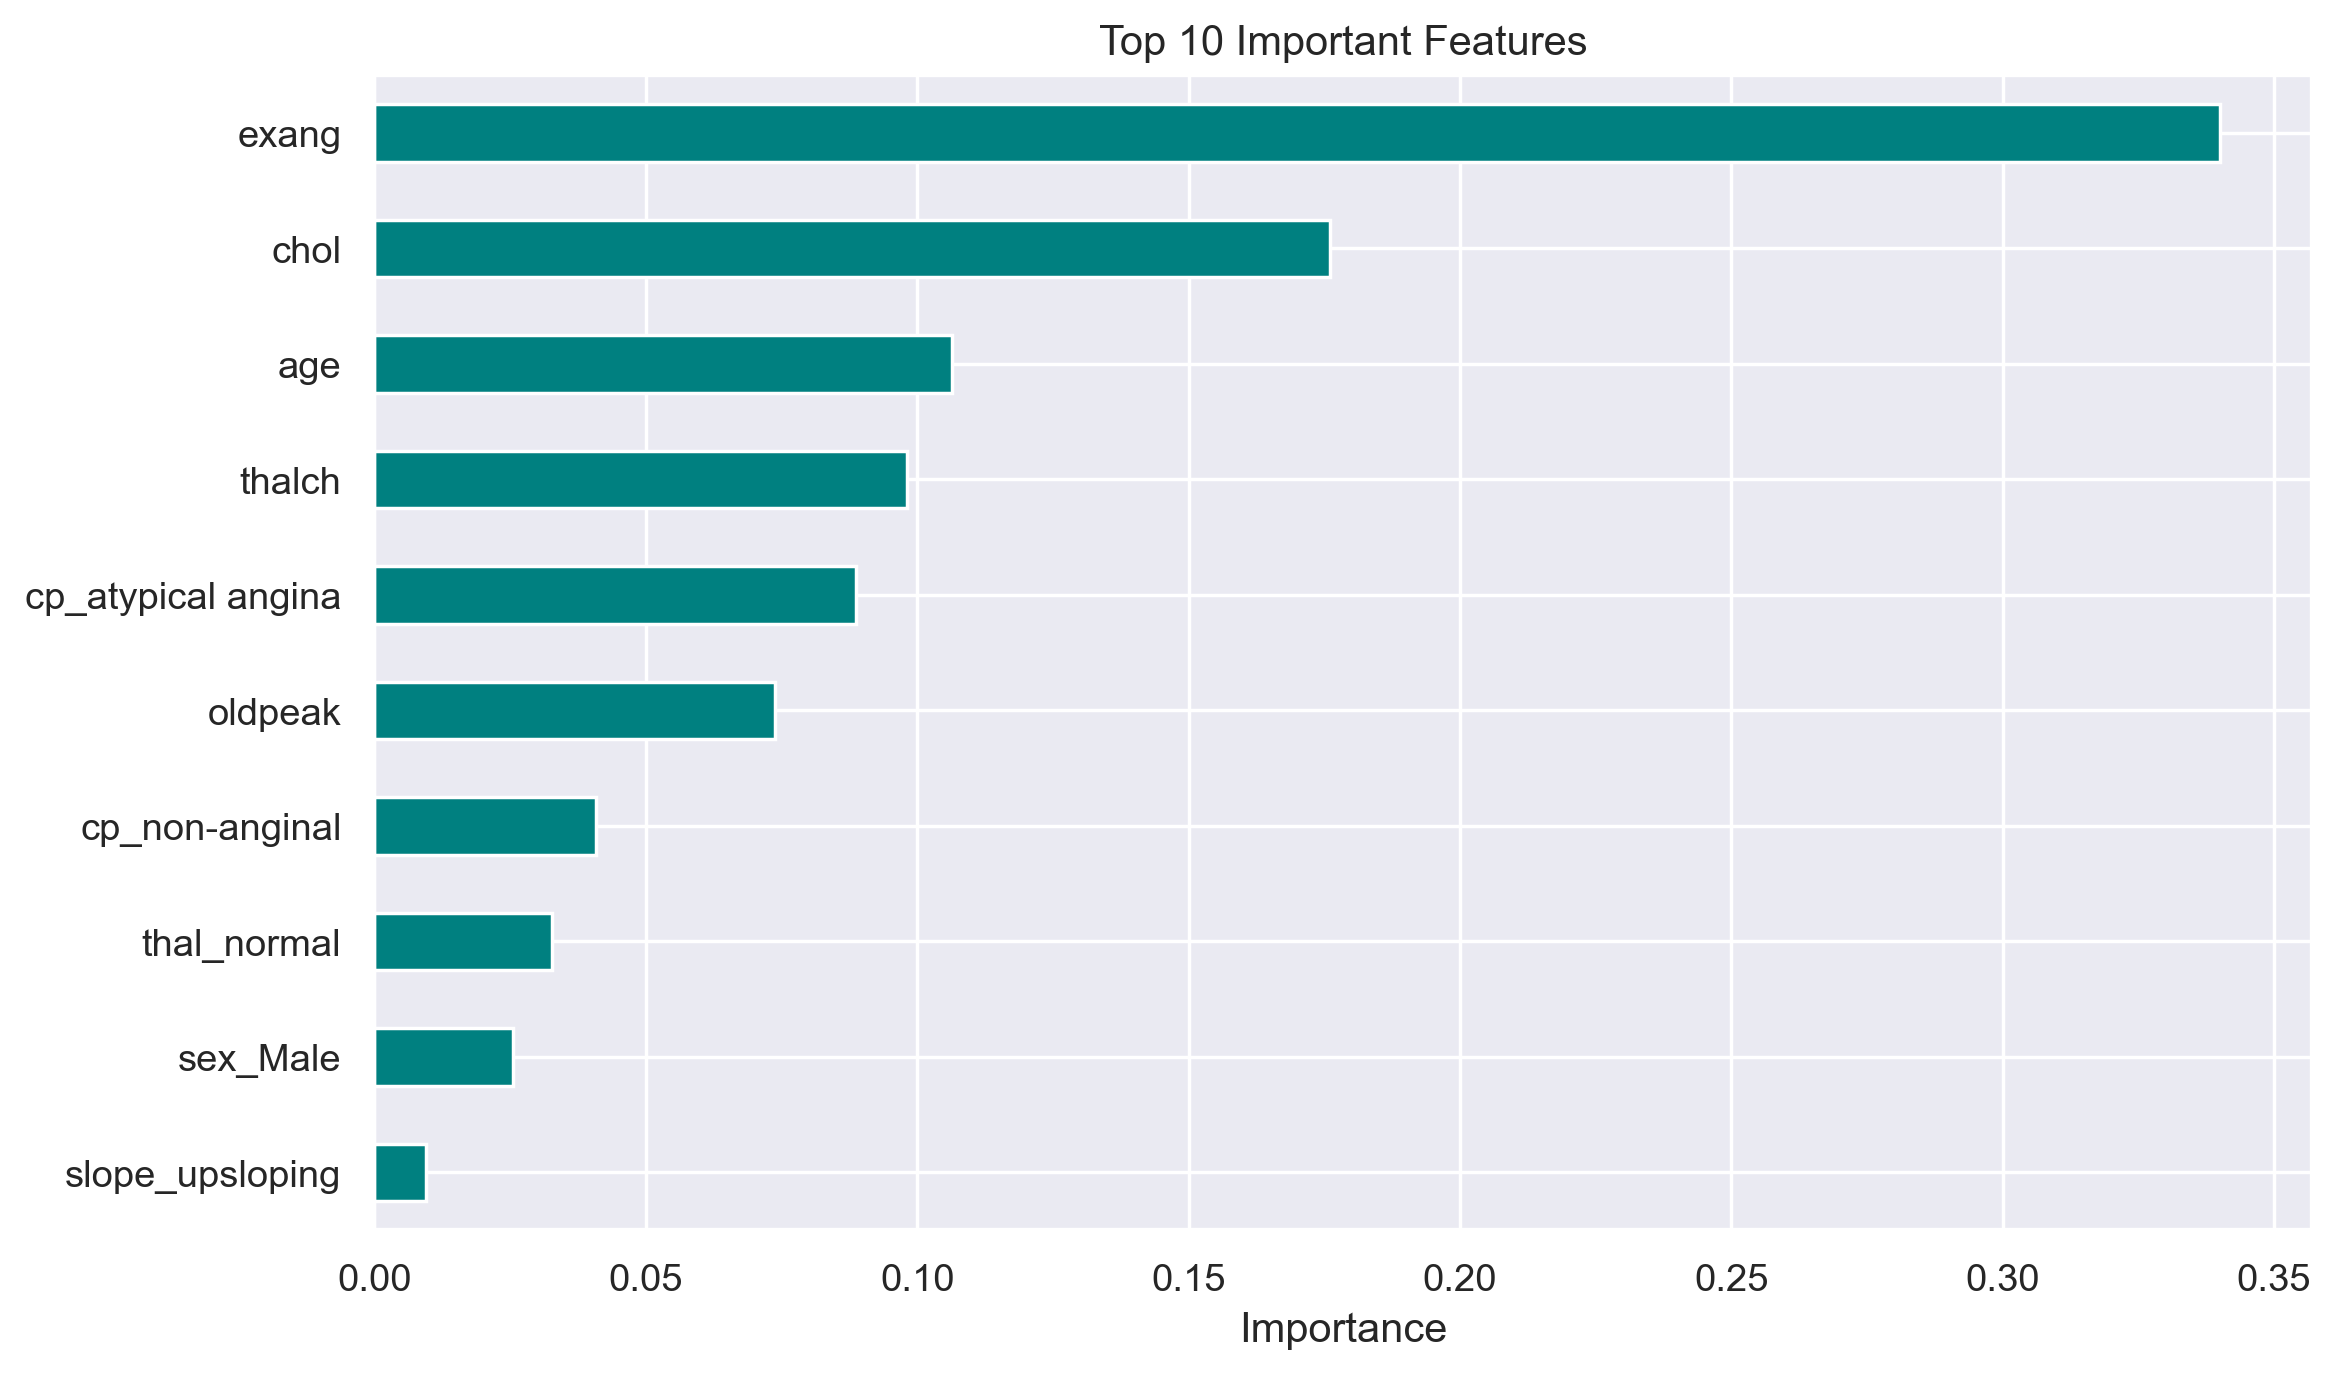

In [132]:
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='teal')
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
'''
The Decision Tree Classifier achieved strong performance, making it suitable for predicting heart disease.
'''

# Interview Questions:

In [ ]:
# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

In [ ]:
'''
Some common hyperparameters of a decision tree are:

max_depth: Limits how deep the tree can go.

min_samples_split: The minimum number of samples needed to split a node. Higher values make the model simpler.

criterion: The function used to measure the quality of a split.

min_samples_leaf: Minimum samples a leaf must have.
'''

In [ ]:
# 2. What is the difference between the Label encoding and One-hot encoding?

In [ ]:
'''
Label Encoding assigns each category a unique number.

One-Hot Encoding creates separate binary columns for each category.

Use Label Encoding for ordinal data (where order matters) and One-Hot Encoding for nominal data (no order).
'''